# Day 4- Lab Activity
##  Classifying Tracks according to Stream Trends

#### Data Prep

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read and process the charts dataset
df = pd.read_csv('data/spotify_daily_charts.csv')
#transform date column into a datetime column
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.head()

,position,track_id,track_name,artist,streams
date,,,,,
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


## Instructions

A track may be classified as follows:

   - **Mainstay** - Track with high streams ($>X_1$ streams) and position ($>P_1$ position) all throughout the year
   - **Viral** - Track that reach the peak positions fast with high increase in streams ($>X_2$ streams/day),
     followed by a rapid decline in position ($P_2$ positions/day) and streams ($>X_3$ streams/day)
   - **Seasonal** - Track that garner considerable streams ($>X_4$ streams) within a certain season (between $T_1$ and $T_2$) and go into low ranks/ disappear from the chart after the season
    
   a. Discuss among your group how you would define and set values to the thresholds ($X_1$,$P_1$,$X_2$,$P_2$,$X_3$,$T_1$,$T_2$,$X_4$) that you will use to classify the tracks according to the categories as described above. (You may add more thresholds to refine the definitions, as you see fit). 
   
   b. Using your group's definition in (a) name as many tracks as you can per classification and plot their streams and position as a time series.

**CHALLENGE:** What percentage of Spotify charts streams from 2017-2021 are from mainstay tracks? viral tracks? seasonal tracks? tracks that do not belong in any of these categories? What does this reveal about the streaming market?

In [97]:
# filtering for 2 years (2018-2019)
df_2years = df.loc['2018-01-01':'2019-12-31']
df_2years

,position,track_id,track_name,artist,streams
date,,,,,
2018-01-01,1,0ofbQMrRDsUaVKq2mGLEAb,Havana (feat. Young Thug),Camila Cabello,155633
2018-01-01,2,0tgVpDi06FyKpA1z0VMD4v,Perfect,Ed Sheeran,134756
2018-01-01,3,3hBBKuWJfxlIlnd9QFoC8k,What Lovers Do (feat. SZA),Maroon 5,130898
2018-01-01,4,1mXVgsBdtIVeCLJnSnmtdV,Too Good At Goodbyes,Sam Smith,130798
2018-01-01,5,2ekn2ttSfGqwhhate0LSR0,New Rules,Dua Lipa,125472
...,...,...,...,...,...
2019-12-31,196,2FRnf9qhLbvw8fu4IBXx78,Last Christmas,Wham!,27083
2019-12-31,197,7gZ3kWNtIxFgxjsm5OTVMB,214,Rivermaya,26880
2019-12-31,198,2qT1uLXPVPzGgFOx4jtEuo,no tears left to cry,Ariana Grande,26770


In [5]:
# groupby track_id and filter 
df_pos_count = df_2years.groupby(['track_id','track_name','artist'])['position'].count().reset_index()
df_1year_stay = df_pos_count[df_pos_count['position'] > 365]
df_1year_stay

,track_id,track_name,artist,position
3,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,December Avenue,678
4,01YEqVPCm0vqRLA9w43bic,Hanggang Kailan,Michael Pangilinan,521
22,06cUybZMETs4i3yQO1f7p3,Weak,Khel Pangilinan,478
28,0815caqt2Lytro5EIzMufT,You And Me,Lifehouse,497
32,09IStsImFySgyp0pIQdqAc,The Middle,Zedd,551
...,...,...,...,...
1705,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,407
1713,7sW3f7PqDV7BQ7qqeVBJIA,Migraine,Moonstar88,729
1724,7uzmGiiJyRfuViKKK3lVmR,Mine,Bazzi,372
1735,7wZUrN8oemZfsEd1CGkbXE,Bleeding Love,Leona Lewis,378


In [131]:
# agg position and streams
agg_df = df_2years.groupby(['track_id','track_name','artist'])[['streams','position']] \
            .agg(position = ('position','mean'), streams = ('streams', 'mean')).reset_index()

In [7]:
agg_df

,track_id,track_name,artist,position,streams
0,003eoIwxETJujVWmNFMoZy,Growing Pains,Alessia Cara,74.652174,45019.869565
1,0087fDVeNhuyMtST91RMjv,Kundiman,Silent Sanctuary,182.446154,22767.769231
2,00bAw28lKcHj3B94a1wJle,Say You Won’t Let Go,Chlara,188.708333,21120.458333
3,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,December Avenue,45.474926,109589.264012
4,01YEqVPCm0vqRLA9w43bic,Hanggang Kailan,Michael Pangilinan,121.472169,30953.059501
...,...,...,...,...,...
1743,7y4JznkAv2W3IKw9T1o2VK,New,Daya,54.974138,52197.853448
1744,7yotKA30dwTKNEGomV9ZsI,KOD,J. Cole,144.947368,24598.052632
1745,7yqkSfpsdd0R1mMlOQ7t3b,One I Love,BATE,172.583333,22491.916667
1746,7zFBtYAVURF3bUVqEQ6UUu,ICY,ITZY,121.189189,34334.405405


In [8]:
agg_df['streams'].quantile(0.9)

73216.06952380948

In [9]:
new_df = agg_df[(agg_df['streams'] > 73217) & (agg_df['position'] < 50)]
new_df

,track_id,track_name,artist,position,streams
3,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,December Avenue,45.474926,109589.264012
16,05CwHjIk71RXVU40boRMnR,Call You Mine (feat. Bebe Rexha),The Chainsmokers,42.362500,81399.525000
24,07JZJ9YJRaiUAz9Bv8wgwH,Mabagal,Daniel Padilla,38.962406,99896.744361
42,0BaMZMMEG7GWrUYsoGw8Yg,Neneng B,Nik Makino,15.540541,197465.418919
58,0Eqg0CQ7bK3RQIMPw1A7pl,Malibu Nights,LANY,33.874449,117277.202643
...,...,...,...,...,...
1674,7hoP5NDUXEbmOawvEAsi8h,'Di Na Babalik,This Band,39.567050,91097.846743
1678,7iDa6hUg2VgEL1o1HjmfBn,Meant to Be (feat. Florida Georgia Line),Bebe Rexha,28.959302,89766.232558
1694,7mW8ar9hy7GSeH4lohyOKs,Hope Not,BLACKPINK,28.000000,108569.000000
1721,7uiBocndm12aKbsdnQ3Scx,Undecided,Chris Brown,42.236994,81554.127168


In [133]:
# final songs that are mainstay in 2018-2019
final_df = pd.merge(new_df, df_1year_stay, on = 'track_id', how = 'inner')
final_df

,track_id,track_name_x,artist_x,position_x,streams,track_name_y,artist_y,position_y
0,00mBzIWv5gHOYxwuEJXjOG,Sa Ngalan Ng Pag-Ibig,December Avenue,45.474926,109589.264012,Sa Ngalan Ng Pag-Ibig,December Avenue,678
1,0Eqg0CQ7bK3RQIMPw1A7pl,Malibu Nights,LANY,33.874449,117277.202643,Malibu Nights,LANY,454
2,0ztDBQdQmdVZvorSmIjMih,Tagpuan,Moira Dela Torre,42.707783,82692.342144,Tagpuan,Moira Dela Torre,681
3,1X4l4i472kW5ofFP8Xo0x0,Sana - Single Version,I Belong to the Zoo,18.846591,158404.043561,Sana - Single Version,I Belong to the Zoo,528
4,1yDiru08Q6omDOGkZMPnei,Maybe The Night,Ben&Ben,43.882102,108262.561080,Maybe The Night,Ben&Ben,704
5,2BgD4nRyx9EZ5o8YEnjRSV,Kung 'Di Rin Lang Ikaw,December Avenue,9.960302,179352.013233,Kung 'Di Rin Lang Ikaw,December Avenue,529
6,2BgEsaKNfHUdlh97KmvFyo,2002,Anne-Marie,38.013917,90229.427435,2002,Anne-Marie,503
7,2tzAN1L07SNwnOdgOEeuQr,Pauwi Nako,PDL,39.485014,112204.495913,Pauwi Nako,PDL,367
8,3WUEs51GpcvlgU7lehLgLh,Kathang Isip,Ben&Ben,22.310959,126182.475342,Kathang Isip,Ben&Ben,730
9,3id2EVGKc3eFAMn9nFnB0r,Love Someone,Lukas Graham,38.795824,109170.953596,Love Someone,Lukas Graham,431


### Kathang Isip

Text(0.5, 1.0, 'Spotify Daily Streams: Ben&Ben - Kathang Isip')

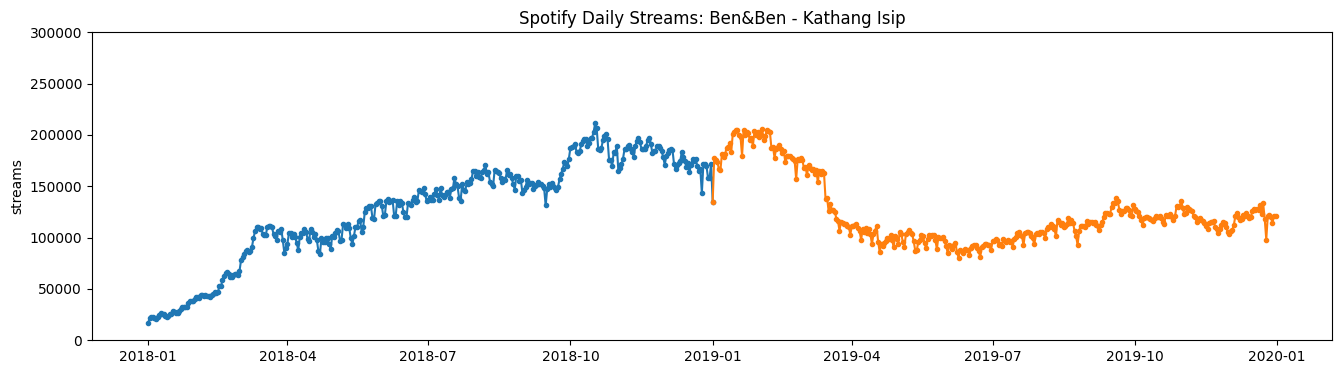

In [25]:
fig,ax = plt.subplots(figsize=(16,4))
data = df_2years[df_2years['track_name']=='Kathang Isip'][['streams']]
data = data['2018-01-01': '2019-12-31']
complete_dates = pd.DataFrame({'date':pd.date_range(data.index.min(), data.index.max())}).set_index('date')
data = complete_dates.join(data, how='left').fillna(0)

ax.plot(data[:'2019-01-01'], marker='.')
ax.plot(data['2019-01-01':], marker='.')

plt.ylim([0,300000])
ax.set_ylabel('streams')
ax.set_title('Spotify Daily Streams: Ben&Ben - Kathang Isip')


Text(0.5, 1.0, 'Spotify Daily Position: Ben&Ben - Kathang Isip')

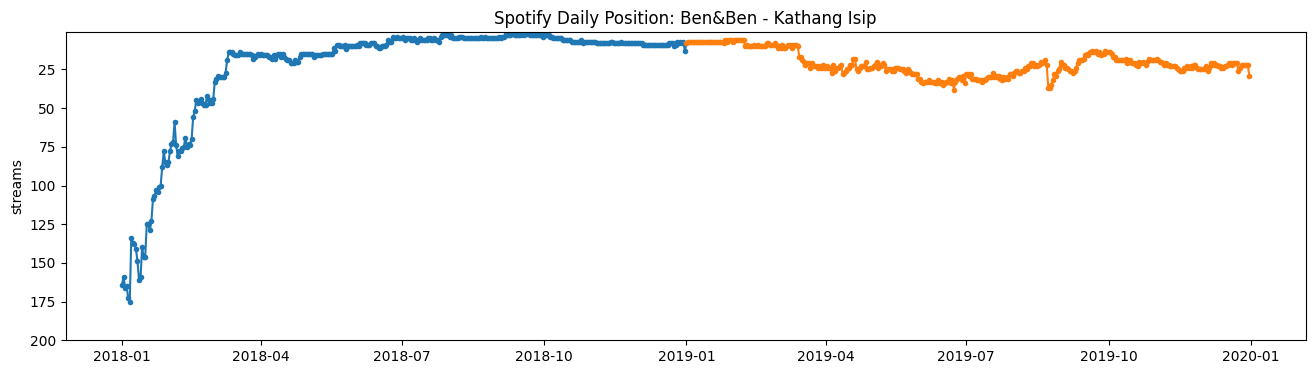

In [80]:
fig,ax = plt.subplots(figsize=(16,4))
data = df_2years[df_2years['track_name']=='Kathang Isip'][['position']]
data = data['2018-01-01': '2019-12-31']
complete_dates = pd.DataFrame({'date':pd.date_range(data.index.min(), data.index.max())}).set_index('date')
data = complete_dates.join(data, how='left').fillna(0)

ax.plot(data[:'2019-01-01'], marker='.')
ax.plot(data['2019-01-01':], marker='.')

plt.ylim([200, 1])
ax.set_ylabel('streams')
ax.set_title('Spotify Daily Position: Ben&Ben - Kathang Isip')

### Pauwi Nako

Text(0.5, 1.0, 'Spotify Daily Streams: PDL - Pauwi Nako')

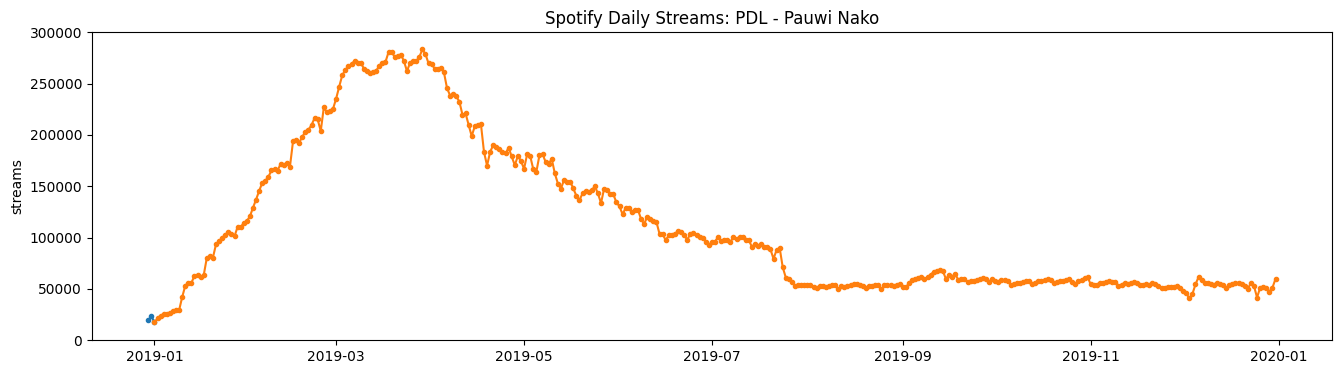

In [24]:
fig,ax = plt.subplots(figsize=(16,4))
data = df_2years[df_2years['track_name']=='Pauwi Nako'][['streams']]
data = data['2018-01-01': '2019-12-31']
complete_dates = pd.DataFrame({'date':pd.date_range(data.index.min(), data.index.max())}).set_index('date')
data = complete_dates.join(data, how='left').fillna(0)

ax.plot(data[:'2019-01-01'], marker='.')
ax.plot(data['2019-01-01':], marker='.')

plt.ylim([0,300000])
ax.set_ylabel('streams')
ax.set_title('Spotify Daily Streams: PDL - Pauwi Nako')


Text(0.5, 1.0, 'Spotify Daily Position: PDL - Pauwi Nako')

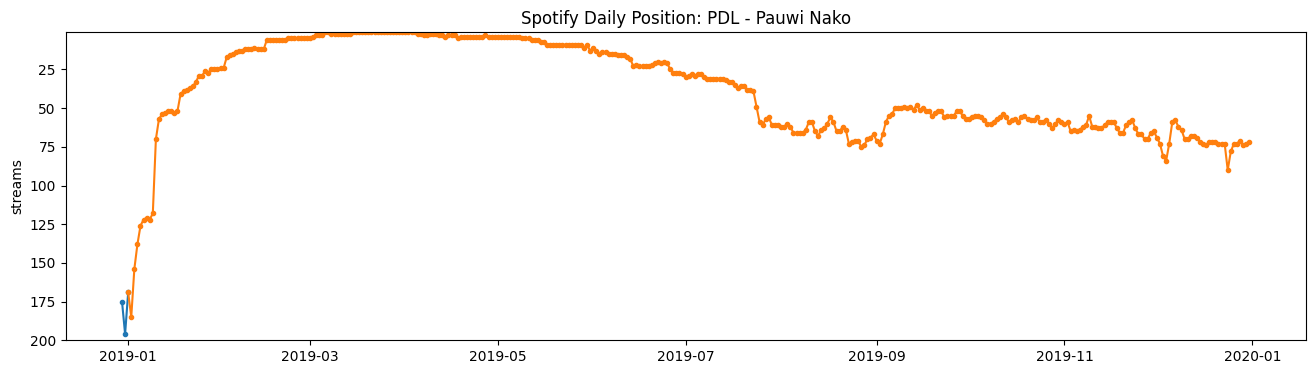

In [79]:
fig,ax = plt.subplots(figsize=(16,4))
data = df_2years[df_2years['track_name']=='Pauwi Nako'][['position']]
data = data['2018-01-01': '2019-12-31']
complete_dates = pd.DataFrame({'date':pd.date_range(data.index.min(), data.index.max())}).set_index('date')
data = complete_dates.join(data, how='left').fillna(0)

ax.plot(data[:'2019-01-01'], marker='.')
ax.plot(data['2019-01-01':], marker='.')

plt.ylim([200, 1])
ax.set_ylabel('streams')
ax.set_title('Spotify Daily Position: PDL - Pauwi Nako')

### 5 Mainstay Songs (2018-2019)

In [68]:
selected_tracks = final_df['track_id'].to_list()
selected_tracks_name = final_df['track_name_x'].to_list()
selected_tracks_name

['Sa Ngalan Ng Pag-Ibig',
 'Malibu Nights',
 'Tagpuan',
 'Sana - Single Version',
 'Maybe The Night',
 "Kung 'Di Rin Lang Ikaw",
 '2002',
 'Pauwi Nako',
 'Kathang Isip',
 'Love Someone',
 'Mundo',
 'Balang Araw - Single Version',
 'Buwan',
 'Bulong',
 'Girls Like You (feat. Cardi B) - Cardi B Version']

Text(0.5, 1.0, 'Spotify Monthly Total Streams')

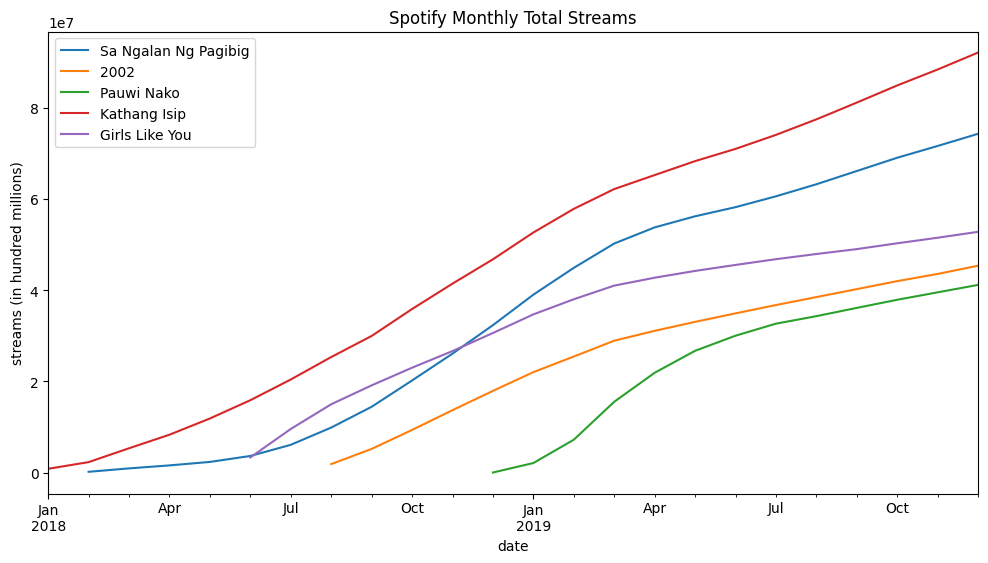

In [98]:
#line chart of monthly streams

fig= plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter
data1 = df_2years[df_2years['track_id']==selected_tracks[0]]['streams'].resample('M').sum().cumsum()
data2 = df_2years[df_2years['track_id']==selected_tracks[6]]['streams'].resample('M').sum().cumsum()
data3 = df_2years[df_2years['track_id']==selected_tracks[7]]['streams'].resample('M').sum().cumsum()
data4 = df_2years[df_2years['track_id']==selected_tracks[8]]['streams'].resample('M').sum().cumsum()
data5 = df_2years[df_2years['track_id']==selected_tracks[14]]['streams'].resample('M').sum().cumsum()

data1.plot(ax=ax, label = 'Sa Ngalan Ng Pagibig')
data2.plot(ax=ax, label= '2002')
data3.plot(ax=ax, label= 'Pauwi Nako')
data4.plot(ax=ax, label= 'Kathang Isip')
data5.plot(ax=ax, label= 'Girls Like You')

#Uncomment for cleaner x labels
#ax.set_xticklabels([x.strftime('%Y-%m') for x in mon_df.index])

plt.legend()
plt.ylabel('streams (in hundred millions)')
plt.title('Spotify Monthly Total Streams')

Text(0.5, 1.0, 'Songs Placement 2018-2019')

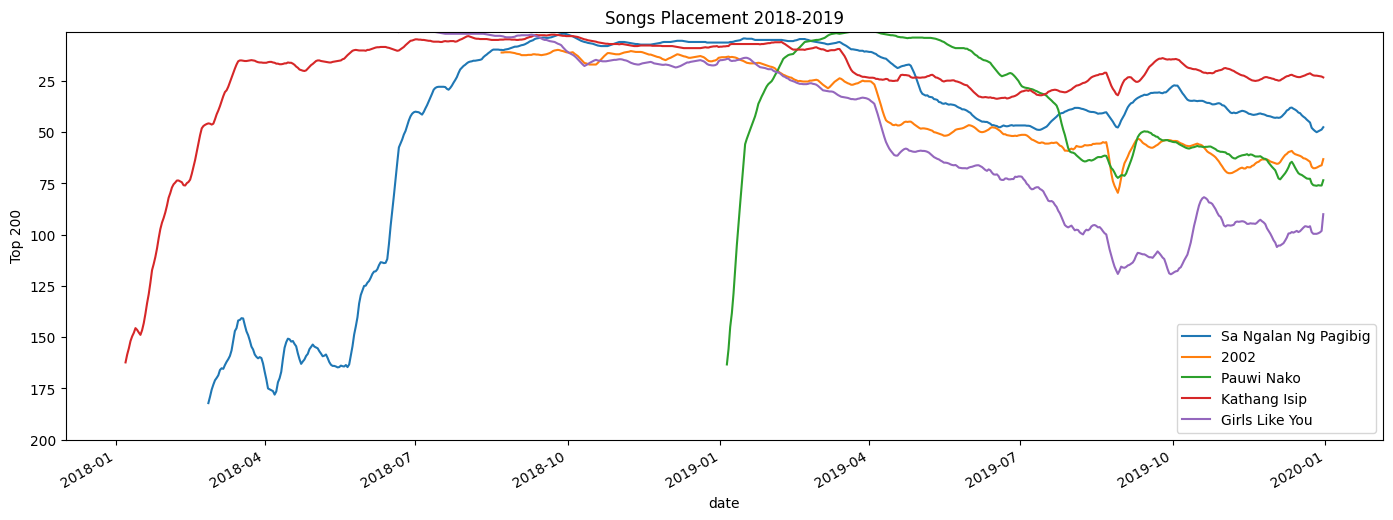

In [132]:
#line chart of monthly streams

fig= plt.figure(figsize=(17,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter
data1 = df_2years[df_2years['track_id']==selected_tracks[0]][['position']].rolling(7).mean()
data2 = df_2years[df_2years['track_id']==selected_tracks[6]][['position']].rolling(7).mean()
data3 = df_2years[df_2years['track_id']==selected_tracks[7]][['position']].rolling(7).mean()
data4 = df_2years[df_2years['track_id']==selected_tracks[8]][['position']].rolling(7).mean()
data5 = df_2years[df_2years['track_id']==selected_tracks[14]][['position']].rolling(7).mean()

data1.plot(ax=ax)
data2.plot(ax=ax)
data3.plot(ax=ax)
data4.plot(ax=ax)
data5.plot(ax=ax)

plt.legend(['Sa Ngalan Ng Pagibig','2002','Pauwi Nako','Kathang Isip','Girls Like You'])
plt.ylim([200, 1])
plt.ylabel('Top 200')
plt.title('Songs Placement 2018-2019')

*Submit this notebook at the end of class time*